In [1]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import seaborn as sns
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv(r'/content/drive/MyDrive/uni works/Machine learning/Labs/ML_project/Speech-based Classification Layer-7/train.csv')
valid = pd.read_csv(r'/content/drive/MyDrive/uni works/Machine learning/Labs/ML_project/Speech-based Classification Layer-7/valid.csv')
test = pd.read_csv(r'/content/drive/MyDrive/uni works/Machine learning/Labs/ML_project/Speech-based Classification Layer-7/test.csv')

In [4]:
train.shape

(28520, 772)

In [5]:
train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'feature_768', 'label_1', 'label_2', 'label_3',
       'label_4'],
      dtype='object', length=772)

In [6]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.186257,-0.058807,0.024632,-0.163933,-0.146699,0.035889,0.111708,-0.162861,0.028249,-0.098063,...,0.055629,-0.010358,0.125754,0.011648,0.079197,0.093215,45,NaN,1,6
1,0.063431,-0.023597,0.068057,-0.252915,-0.061094,-0.027316,0.135747,-0.168147,0.091236,-0.078473,...,-0.014893,0.071721,0.018918,0.100032,-0.083042,0.088615,45,NaN,1,6
2,0.034962,0.035816,-0.029753,-0.094607,-0.017576,-0.053074,0.040121,-0.007932,0.097872,-0.024042,...,0.012415,0.015215,0.083808,0.031312,-0.056277,0.064702,45,NaN,1,6
3,0.033772,0.085612,0.067488,-0.073953,-0.180646,-0.024512,0.242879,-0.023374,-0.059999,0.002006,...,-0.078246,-0.032903,0.082949,-0.020659,0.082274,-0.050164,45,NaN,1,6
4,0.134305,0.062096,0.106920,-0.089327,0.117093,-0.077107,0.152579,0.047529,-0.015998,-0.110657,...,-0.094629,0.069718,0.014379,0.048124,0.007586,-0.016980,45,NaN,1,6


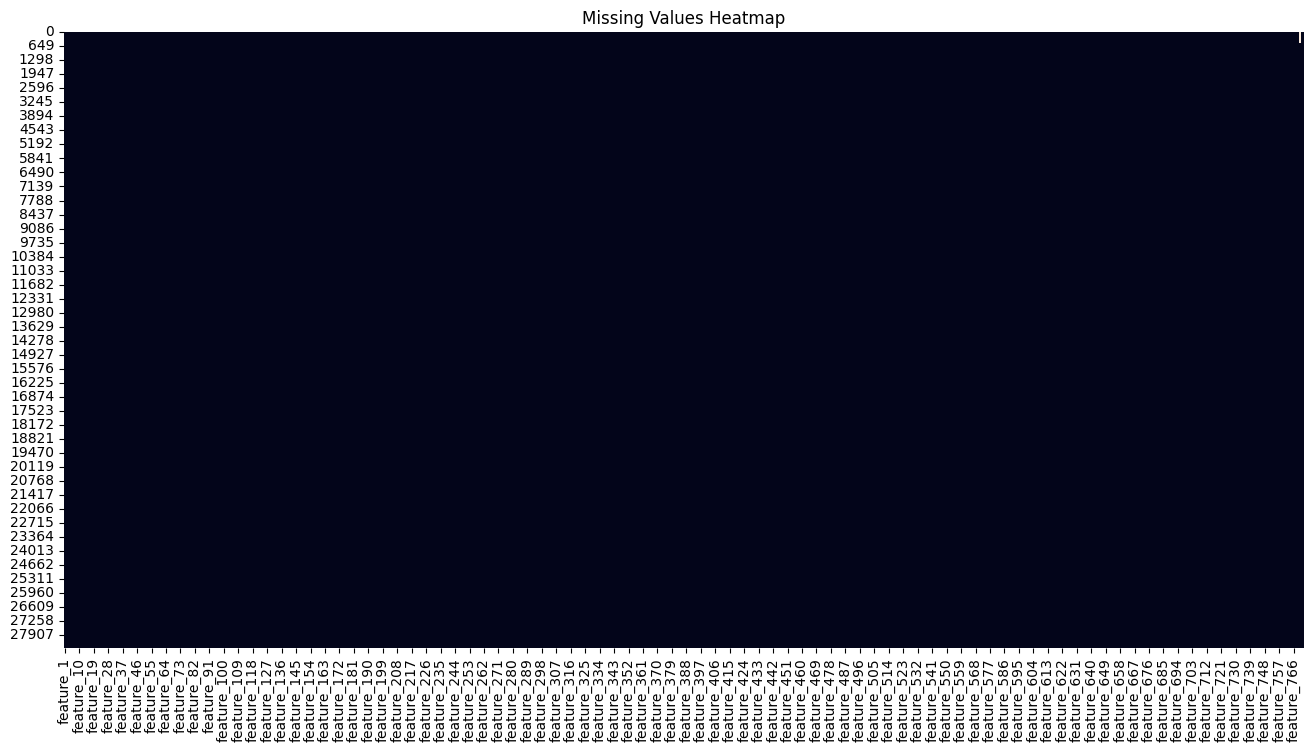

In [7]:
missing_matrix = train.isnull()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(missing_matrix, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
missing_counts = train.isnull().sum()
for column, count in missing_counts.items():
  if(count!=0):
    print(f"Column '{column}': {count} missing values")

Column 'label_2': 480 missing values


In [9]:
# Drop the row that contain missing value
train_clean = train.dropna()
train_clean.reset_index(drop = True, inplace = True)

In [10]:
train_clean.shape

(28040, 772)

# **Analysis the label**

## Label-1

In [11]:
train['label_1'].unique()

array([45,  5, 60, 19, 11, 52, 25, 46, 51, 35, 56, 53,  3, 40, 43, 58, 44,
       37, 55, 17,  2, 47, 54, 21, 34, 23, 10, 28, 20,  7,  6,  4, 48, 32,
       12, 22, 38, 36, 59, 50, 14, 15, 24, 13, 29, 18,  1,  9, 49, 27, 42,
       26, 41, 57,  8, 33, 31, 16, 30, 39])

In [12]:
pd.Series(train['label_1']).value_counts()

12    485
35    484
26    483
60    482
24    482
25    481
59    481
10    481
54    481
45    480
41    480
9     480
2     479
42    479
47    479
6     479
56    479
34    478
52    478
3     478
14    478
33    478
43    477
1     477
13    477
20    477
23    477
30    476
51    476
32    476
53    476
22    476
38    476
49    476
55    475
28    474
8     474
40    474
48    474
21    474
4     474
39    473
17    473
7     473
15    472
58    472
5     471
27    471
31    470
19    469
11    469
46    469
29    469
36    468
16    468
50    467
37    467
44    467
57    466
18    465
Name: label_1, dtype: int64

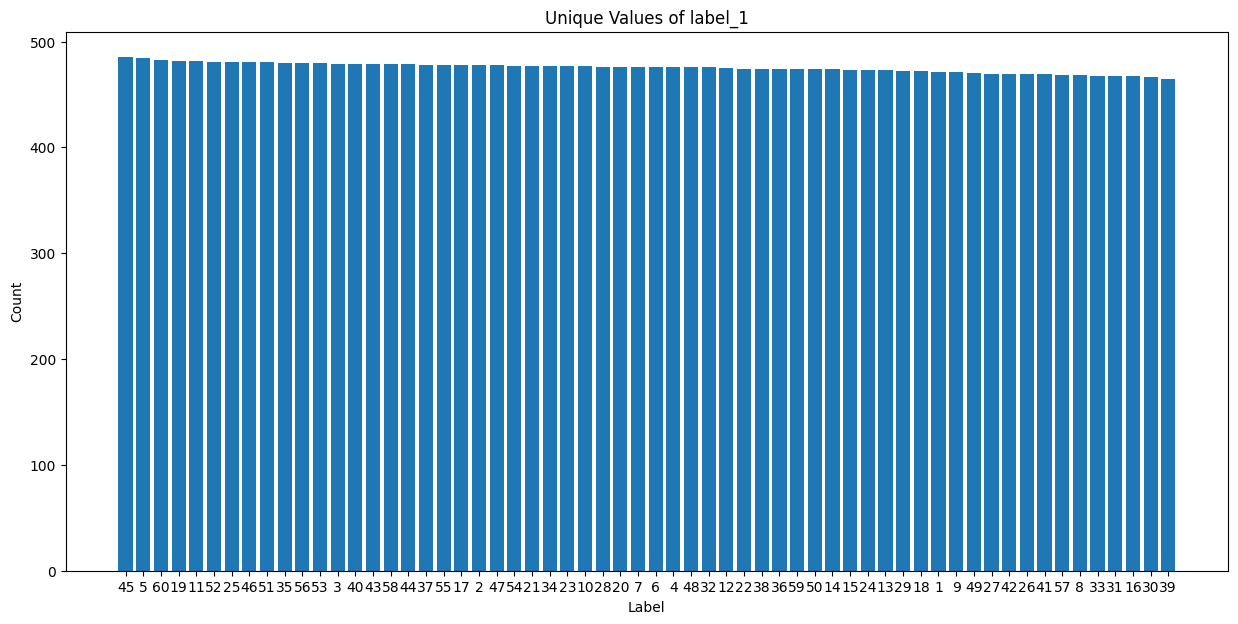

In [13]:
plt.figure(figsize=(15, 7))
# Get the unique values of the 'label_4' column
unique_labels = train['label_1'].unique()
unique_labels=unique_labels.astype(str)
# Count the occurrences of each unique label
label_counts = train['label_1'].value_counts()

# Create a bar plot
plt.bar(unique_labels, label_counts)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Unique Values of label_1')

# Show the plot
plt.show()

## Prepare data

In [14]:
train_data = train.values
train_2_data = train_clean.values
X_1 = train.drop(columns=['label_1','label_2','label_3','label_4'])

x_2 = train_clean.drop(columns=['label_1','label_2','label_3','label_4'])

y_1 = np.array(train_data[:,768])
y_1 = np.asarray(y_1, dtype = 'int')

y_2 = np.array(train_2_data[:,769])
y_3 =np.array(train_data[:,770] )
y_4 =np.array(train_data[:,771])

In [15]:
valid_data = valid.values
X_valid = valid.drop(columns=['label_1','label_2','label_3','label_4'])

y_1_valid = np.array(valid_data[:,768])
y_1_valid = np.asarray(y_1_valid, dtype = 'int')

y_2_valid = np.array(valid_data[:,769])
y_3_valid =np.array(valid_data[:,770] )
y_4_valid =np.array(valid_data[:,771])

In [40]:
x_test_data = test.drop(columns='ID')

## Model build

In [16]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV ,cross_val_score

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),X_1, y_1, cv=5)

In [ ]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_1, y_1)

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=1,gamma='auto'),X_1, y_1, cv=5)

In [21]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

### Noraml

In [22]:
cross_val_score(svm.SVC(kernel='linear',C=1,gamma='auto'),X_1, y_1, cv=5)

array([0.9651122 , 0.96476157, 0.96528752, 0.9673913 , 0.9673913 ])

In [ ]:
def noramal_feature_select(x,y,isDiagramNeed=True):
  feature_names = [f"feature_{i+1}" for i in range(x.shape[1])]
  forest = RandomForestClassifier(random_state=0)
  forest.fit(x, y)
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
  forest_importances = pd.Series(importances, index=feature_names)
  if(isDiagramNeed):
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
  return forest_importances
def noraml_train_model(score,forest_importances,x,y):
  label_feature_drop_list=[]
  # print(np.min(forest_importances.values()))
  for key,value  in forest_importances.items():
    if(value<score):
      label_feature_drop_list.append(key)
  print("number of features drop in the list out of ",len(x.loc[0]), ":",len(label_feature_drop_list))
  X_train = x.drop(columns=label_feature_drop_list)
  score_train=cross_val_score(svm.SVC(kernel='linear',C=1,gamma='auto'),X_train, y, cv=5)
  return score_train

In [ ]:
forest_importances_1=noramal_feature_select(X_1,y_1,isDiagramNeed=True)

In [ ]:
noraml_train_model(0.0013,forest_importances_1,X_1,y_1)

In [ ]:
len(X_1.loc[0])

### PCA

In [17]:
n_components = 455

In [23]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_1)
# feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
feature_names = [f"feature_{i+1}" for i in range(n_components)]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_pca, y_1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

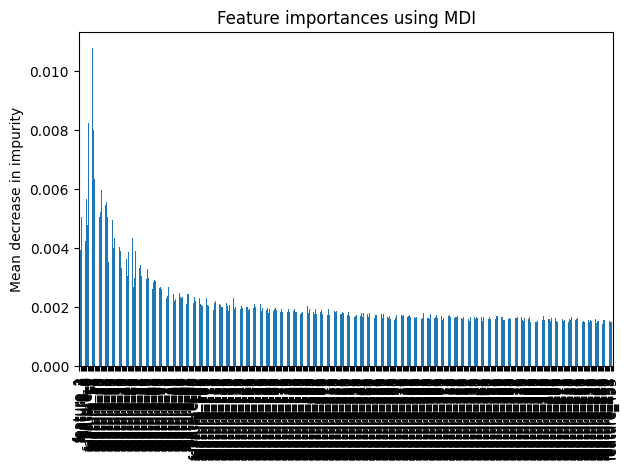

In [24]:
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [25]:
score = 0
label_feature_drop_list=[]
# # print(np.min(forest_importances.values()))
for key,value  in forest_importances.items():
  if(value<score):
    label_feature_drop_list.append(key)
print("number of features drop in the list out of ",n_components, ":",len(label_feature_drop_list))
X_train=pd.DataFrame(X_train_pca,columns=feature_names)
X_train = X_train.drop(columns=label_feature_drop_list)

number of features drop in the list out of  455 : 0


In [26]:
X_valid_pca = pca.transform(X_valid)
X_valid_pca = pd.DataFrame(X_valid_pca,columns=feature_names)
X_valid_pca = X_valid_pca.drop(columns=label_feature_drop_list)

In [55]:
cross_val_score(svm.SVC(kernel='linear',C=1,gamma='auto'),X_train, y_1, cv=5)

array([0.95126227, 0.95091164, 0.9526648 , 0.95231417, 0.95704769])

In [46]:
# all -> array([0.9651122 , 0.96476157, 0.96528752, 0.9673913 , 0.9673913 ])
# 245 -> array([0.96037868, 0.95967742, 0.95932679, 0.96090463, 0.96107994])
# 255 -> array([0.96160589, 0.95915147, 0.95897616, 0.96037868, 0.96353436])
# 260 -> array([0.96107994, 0.95967742, 0.95897616, 0.96107994, 0.96143058])
# 265 -> array([0.96213184, 0.9595021 , 0.96020337, 0.96143058, 0.96265778])
# 270 -> array([0.96072931, 0.95967742, 0.96002805, 0.96125526, 0.96230715])
# 272 -> array([0.96002805, 0.95967742, 0.96002805, 0.96125526, 0.96213184])
# 455 -> array([0.96423562, 0.96353436, 0.96370968, 0.96563815, 0.96598878])


In [82]:
model = svm.SVC(kernel='linear',C=1,gamma='auto')
model.fit(X_train,y_1)
model.score(X_valid_pca, y_1_valid)

0.972

In [32]:
model_final = svm.SVC(kernel='linear',C=1,gamma='auto')
model_final.fit(X_1,y_1)
model_final.score(X_valid, y_1_valid)

0.9746666666666667

In [44]:
# Make predictions on the test data
y_pred_final = model_final.predict(x_test_data)

In [46]:
from google.colab import files
filename = 'ML_Project_label_1.csv'
y_pred_final = pd.DataFrame(y_pred_final)
y_pred_final.to_csv(filename, encoding = 'utf-8-sig',index= False)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import xgboost as xgb

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the labels to start from 0
y_encoded = label_encoder.fit_transform(y_1)
y_encoded_valid = label_encoder.fit_transform(y_1_valid)

# Initialize the XGBoost classifier (or regressor for regression tasks)
model_xgb = xgb.XGBClassifier(
    learning_rate=0.01,  # Adjust the learning rate as needed
    n_estimators=50,   # Adjust the number of trees as needed
    max_depth=6,        # Adjust the maximum depth of trees as needed
    random_state=42,
    verbose=500
)
model_xgb.fit(X_1,y_encoded)

In [ ]:
model_xgb.score(X_valid, y_encoded_valid)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the labels to start from 0
y_encoded = label_encoder.fit_transform(y_1)
y_encoded_valid = label_encoder.fit_transform(y_1_valid)

# Initialize the XGBoost classifier (or regressor for regression tasks)
model_xgb_2 = xgb.XGBClassifier(
    learning_rate=0.1,  # Adjust the learning rate as needed
    n_estimators=100,   # Adjust the number of trees as needed
    max_depth=3,        # Adjust the maximum depth of trees as needed
    random_state=42
)
model_xgb_2.fit(X_train,y_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
# Make predictions on the test data
y_pred = model_xgb_2.predict(X_valid_pca)

# Evaluate the model's performance
accuracy = accuracy_score(y_encoded_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [27]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [28]:
import catboost
from catboost import CatBoostClassifier

In [31]:
model_catBoost = CatBoostClassifier(
   iterations=100,           # Number of boosting iterations (trees)
    learning_rate=0.01,        # Learning rate
    depth=6,                  # Maximum depth of trees
    loss_function='MultiClass',  # Specify the loss function for multi-class
    verbose=500               # Print progress every 500 iterations
)
# Fit the model to the training data
model_catBoost.fit(X_1,y_1)

# Make predictions on the test data
y_pred = model_catBoost.predict(X_valid)

# Evaluate the model's performance
accuracy = accuracy_score(y_1_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

0:	learn: 4.0811771	total: 29.5s	remaining: 48m 38s
99:	learn: 3.2323384	total: 47m 23s	remaining: 0us
Accuracy: 0.54


In [80]:
X_valid_pca.shape

(750, 455)

In [75]:
X_train.shape

(28520, 455)